# Importing Libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# Loading dataset
car_data = pd.read_csv('/content/sample_data/car_sales_data_24.csv')
car_data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


## Data Manipulation and Exploration

In [ ]:
# Making a copy of the data for reference purpose
car_data = car_data.copy()

# Displaying first five rows of the copied data
car_data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [ ]:
# Checking data dimensionality
car_data.shape

(50000, 7)

The data contains 50,000 rows and 7 columns

In [ ]:
# Checking basic information of each columns
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


From the above we can see that:
- There are no missing values
- There are three (3) categrorical columns (Manufacturer, Model and Fuel type)
- There are four (4) numerical columns (Engine size, Year of manufacture, Mileage and Price)

# Data Cleaning

In [ ]:
# Checking for duplicates
car_data.duplicated().sum()

12

There are 12 duplicates in the data

In [ ]:
# Shape before duplicates removal
print(f"Shape before duplicates removal: {car_data.shape}")

# Removing duplicates
car_data.drop_duplicates(inplace = True)

# Shape after duplicates removal
print(f"Shape after duplicates removal: {car_data.shape}")

Shape before duplicates removal: (50000, 7)
Shape after duplicates removal: (49988, 7)


The number of rows have dropped from 50,000 to 49,988 after removing the 12 duplicates

In [ ]:
# Confirming no missing values
car_data.isnull().sum()

,0
Manufacturer,0
Model,0
Engine size,0
Fuel type,0
Year of manufacture,0
Mileage,0
Price,0


In [ ]:
car_data.Manufacturer.unique()

array(['Ford', 'Porsche', 'Toyota', 'VW', 'BMW'], dtype=object)

In [ ]:
car_data["Model"].unique()

array(['Fiesta', '718 Cayman', 'Mondeo', 'RAV4', 'Polo', 'Focus', 'Prius',
       'Golf', 'Z4', 'Yaris', '911', 'Passat', 'M5', 'Cayenne', 'X3'],
      dtype=object)

In [ ]:
car_data["Engine size"].unique()

array([1. , 4. , 1.6, 1.8, 1.4, 1.2, 2. , 2.2, 2.4, 2.6, 3.5, 4.4, 3. ,
       5. ])

In [ ]:
car_data["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [ ]:
# Checking unique values of columns
for column in car_data.columns:
    print(f"""Unique values of {column} are:
    {car_data[column].unique()}
    """)

Unique values of Manufacturer are:
    ['Ford' 'Porsche' 'Toyota' 'VW' 'BMW']
    
Unique values of Model are:
    ['Fiesta' '718 Cayman' 'Mondeo' 'RAV4' 'Polo' 'Focus' 'Prius' 'Golf' 'Z4'
 'Yaris' '911' 'Passat' 'M5' 'Cayenne' 'X3']
    
Unique values of Engine size are:
    [1.  4.  1.6 1.8 1.4 1.2 2.  2.2 2.4 2.6 3.5 4.4 3.  5. ]
    
Unique values of Fuel type are:
    ['Petrol' 'Diesel' 'Hybrid']
    
Unique values of Year of manufacture are:
    [2002 2016 2014 1988 2006 2018 2010 2015 2012 1992 1990 2007 1998 1989
 2003 1987 1996 2009 2017 2005 2020 2001 2008 1995 2000 1994 2004 1997
 1993 1991 1999 1985 2021 2013 1986 1984 2019 2011 2022]
    
Unique values of Mileage are:
    [127300  57850  39190 ...   4030  26468 109300]
    
Unique values of Price are:
    [  3074  49704  24072 ... 113006  49852  23630]
    


In [ ]:
columns = car_data.columns
columns

Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')

In [ ]:
# Summary Statistics of numerical variables
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine size,49988.0,1.773140,0.734149,1.0,1.40,1.6,2.00,5.0
Year of manufacture,49988.0,2004.209630,9.646056,1984.0,1996.00,2004.0,2012.00,2022.0
Mileage,49988.0,112515.561215,71624.341062,630.0,54375.25,101011.5,158617.25,453537.0
Price,49988.0,13829.112387,16417.812203,76.0,3059.75,7971.0,19028.50,168081.0


In [ ]:
# Checking the basic statistics of categorical variables
car_data.astype("category").describe()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
count,49988,49988,49988.0,49988,49988,49988,49988
unique,5,15,14.0,3,39,44971,25045
top,Ford,Mondeo,1.4,Petrol,2018,11500,1610
freq,14956,5057,10059.0,25480,1646,8,14


## Correlation Analysis

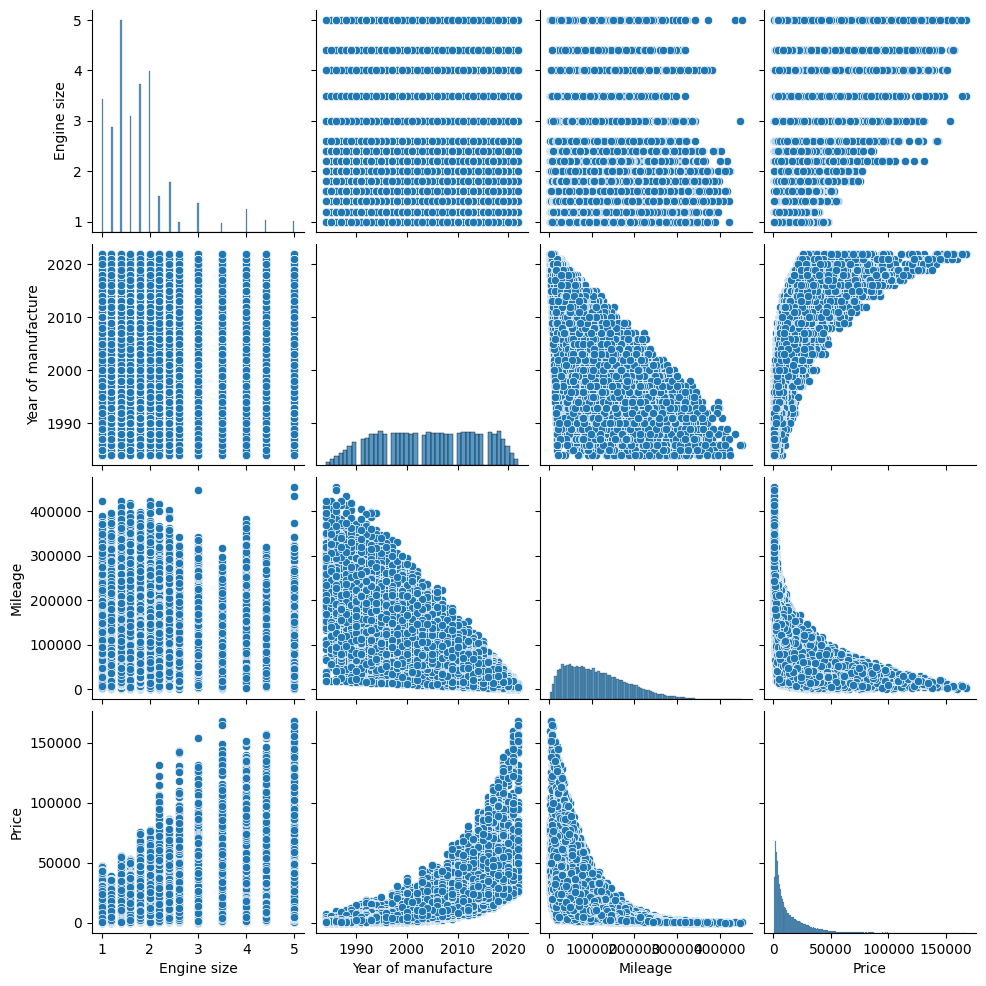

In [ ]:
# Plot pairplot to visualize relationships
sns.pairplot(car_data)
plt.show()

In [ ]:
# Correlation matrix
# Copying the entire, encoding the strings, in order to do a correlation matrix
from sklearn.preprocessing import LabelEncoder

car_data_temp = car_data.copy()

# Looping through all columns and applying LabelEncoder to categorical columns
label_encoder = LabelEncoder()
for column in car_data_temp.columns:
    if car_data_temp[column].dtype == 'object':
        car_data_temp[column] = label_encoder.fit_transform(car_data_temp[column])

# Calculating the correlation matrix
correlation_matrix = car_data_temp.corr()
correlation_matrix

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
Manufacturer,1.000000,0.207500,-0.330791,-0.055475,0.000855,0.002104,-0.132919
Model,0.207500,1.000000,-0.077359,-0.120279,-0.001028,-0.005708,-0.034318
Engine size,-0.330791,-0.077359,1.000000,0.075719,-0.000675,0.004470,0.398371
Fuel type,-0.055475,-0.120279,0.075719,1.000000,-0.001518,0.001758,0.007992
Year of manufacture,0.000855,-0.001028,-0.000675,-0.001518,1.000000,-0.807458,0.714209
Mileage,0.002104,-0.005708,0.004470,0.001758,-0.807458,1.000000,-0.632692
Price,-0.132919,-0.034318,0.398371,0.007992,0.714209,-0.632692,1.000000


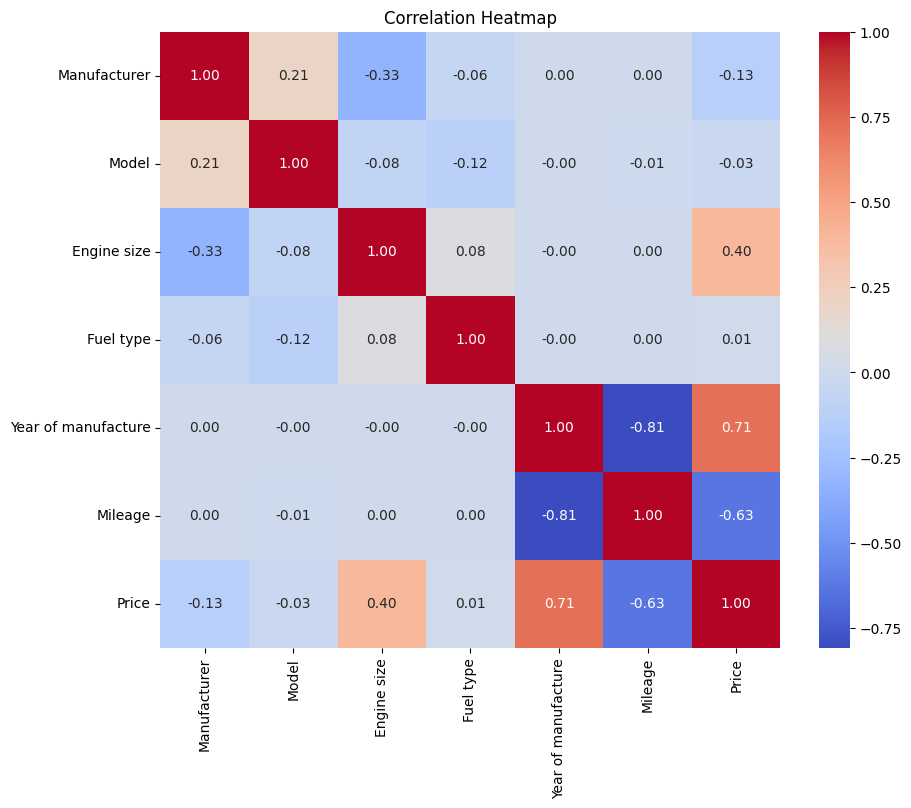

In [ ]:
# Plotting a heatmap to visualize into the relationship between variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Single numerical input feature linear regression models comparison

***(A). Compare regression models that predict the price of a car based on a single numerical input feature. Based on your results, which numerical variable in the dataset is the best predictor for a car’s price, and why? For each numerical input feature, is the price better fit by a linear model or by a non-linear (e.g. polynomial) model?***

In [ ]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Scaling the data
scaler = StandardScaler()

# Selecting only numerical features
numerical_features = car_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Price')  # Remove the target variable if it's in the list

# Splitting data into training and testing sets
X = car_data[numerical_features]
y = car_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensuring indices are aligned
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

results = {}

# Function to fit and evaluate a model
def fit_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r_squared = model.score(X_test, y_test)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    return mse, mae, adjusted_r_squared

# Comparing linear and polynomial regression models for each feature
for feature in numerical_features:
    X_train_feat = X_train_scaled[[feature]]
    X_test_feat = X_test_scaled[[feature]]

    # Linear Regression
    lin_reg = LinearRegression()
    lin_mse, lin_mae, lin_adj_r2 = fit_and_evaluate(lin_reg, X_train_feat, X_test_feat, y_train, y_test)

    # Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_feat)
    X_test_poly = poly.transform(X_test_feat)

    poly_reg = LinearRegression()
    poly_mse, poly_mae, poly_adj_r2 = fit_and_evaluate(poly_reg, X_train_poly, X_test_poly, y_train, y_test)

    results[feature] = {
        'Linear MSE': lin_mse,
        'Linear MAE': lin_mae,
        'Linear Adjusted R2': lin_adj_r2,
        'Polynomial MSE': poly_mse,
        'Polynomial MAE': poly_mae,
        'Polynomial Adjusted R2': poly_adj_r2
    }

# Converting results to DataFrame for better readability
results_df = pd.DataFrame(results).T
results_df['Best Model'] = results_df.apply(
    lambda row: 'Linear' if row['Linear MSE'] < row['Polynomial MSE'] else 'Polynomial', axis=1
)
results_df = results_df.sort_values(by='Linear MSE')

# Forward Elimination
X_train_with_const = sm.add_constant(X_train_scaled)
X_test_with_const = sm.add_constant(X_test_scaled)

def forward_selection(X, y):
    included = ['const']  # start with the constant
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, X[included + [new_column]]).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < 0.05:  # p-value threshold
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
        if not changed:
            break
    return included

# Ensuring indices are aligned for y_train
y_train_aligned = y_train.loc[X_train_with_const.index]

selected_features = forward_selection(X_train_with_const, y_train_aligned)
final_model = sm.OLS(y_train_aligned, X_train_with_const[selected_features]).fit()


# Summary of the final model
final_model_summary = final_model.summary()

results_df, final_model_summary

(                       Linear MSE    Linear MAE  Linear Adjusted R2  \
 Year of manufacture  1.309155e+08   7016.337531            0.516343   
 Mileage              1.612428e+08   8002.006588            0.404301   
 Engine size          2.284027e+08  10780.458294            0.156184   
 
                      Polynomial MSE  Polynomial MAE  Polynomial Adjusted R2  \
 Year of manufacture    1.041713e+08     5397.387393                0.615071   
 Mileage                1.291440e+08     6449.063785                0.522793   
 Engine size            2.282097e+08    10771.198952                0.156729   
 
                      Best Model  
 Year of manufacture  Polynomial  
 Mileage              Polynomial  
 Engine size          Polynomial  ,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Price   R-squared:                       0.678
 Model:                            OL

### Comparing Regression Models with multiple numerical variables

***(B). Consider regression models that take multiple numerical variables as input features to predict the price of a car. Does the inclusion of multiple input features improve the accuracy of the model’s prediction compared to the single-input feature models that you explored in part (a)?***

#### 1. GradientBoosting Regression Model

In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import time

# Identify numerical features only
numerical_features = car_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Price')  # Remove the target variable if it's in the list

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Gradient Boosting Regressor
model = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('regressor', GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42))
])

# Split the data into training and testing sets
X = car_data[numerical_features]
y = car_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model and measure time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"Gradient Boosting Regressor fitting took {end_time - start_time} seconds")

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared manually
n = len(y_test)
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Cross-validation scores
cv_folds = 3  # Fewer folds for faster computation
cv_mse = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_squared_error').mean()
cv_mae = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_absolute_error').mean()
cv_r2 = cross_val_score(model, X, y, cv=cv_folds, scoring='r2').mean()

# Calculate Cross-Validated Adjusted R-squared
cv_n = len(X)  # Number of samples in the entire dataset
cv_p = X.shape[1]  # Number of predictors
cv_adjusted_r2 = 1 - ((1 - cv_r2) * (cv_n - 1) / (cv_n - cv_p - 1))

# Display the results
print("Gradient Boosting Regressor Results")
print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R-squared:", r2)
print("Test Adjusted R-squared:", adjusted_r2)
print("Cross-Validated MSE:", cv_mse)
print("Cross-Validated MAE:", cv_mae)
print("Cross-Validated R-squared:", cv_r2)
print("Cross-Validated Adjusted R-squared:", cv_adjusted_r2)

Gradient Boosting Regressor fitting took 3.2108592987060547 seconds
Gradient Boosting Regressor Results
Test MSE: 15568152.840765746
Test MAE: 2079.1869935421514
Test R-squared: 0.942632370489886
Test Adjusted R-squared: 0.9426151533141627
Cross-Validated MSE: 15168806.249052063
Cross-Validated MAE: 2097.9189443979794
Cross-Validated R-squared: 0.9437111838275666
Cross-Validated Adjusted R-squared: 0.9437078062283883


#### 2. AdaBoost Regression Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
model = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('regressor', AdaBoostRegressor(n_estimators=50, random_state=42))
])

# Fit the model and measure time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"AdaBoost Regressor fitting took {end_time - start_time} seconds")

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared manually
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Cross-validation scores
cv_mse = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_squared_error').mean()
cv_mae = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_absolute_error').mean()
cv_r2 = cross_val_score(model, X, y, cv=cv_folds, scoring='r2').mean()

# Calculate Cross-Validated Adjusted R-squared
cv_adjusted_r2 = 1 - ((1 - cv_r2) * (cv_n - 1) / (cv_n - cv_p - 1))

# Display the results
print("AdaBoost Regressor Results")
print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R-squared:", r2)
print("Test Adjusted R-squared:", adjusted_r2)
print("Cross-Validated MSE:", cv_mse)
print("Cross-Validated MAE:", cv_mae)
print("Cross-Validated R-squared:", cv_r2)
print("Cross-Validated Adjusted R-squared:", cv_adjusted_r2)

AdaBoost Regressor fitting took 2.8619508743286133 seconds
AdaBoost Regressor Results
Test MSE: 40222395.56246376
Test MAE: 4910.4820606657595
Test R-squared: 0.8517830914021797
Test Adjusted R-squared: 0.851738608536454
Cross-Validated MSE: 45138019.98502847
Cross-Validated MAE: 5354.53055365874
Cross-Validated R-squared: 0.8324896340542791
Cross-Validated Adjusted R-squared: 0.8324795826282083


#### 3. Support Vector Regression Model

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import warnings

# filtering warnings
warnings.filterwarnings('ignore')

# Optionally reduce the size of the dataset for faster computation (uncomment if needed)
# X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Define the pipeline using LinearSVR
model = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('regressor', LinearSVR(C=0.1, epsilon=0.2, max_iter=1000, random_state=42))
])

# Fit the model and measure time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"LinearSVR fitting took {end_time - start_time} seconds")

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared manually
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Cross-validation scores with fewer folds for faster computation
cv_folds = 3
cv_mse = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_squared_error').mean()
cv_mae = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_absolute_error').mean()
cv_r2 = cross_val_score(model, X, y, cv=cv_folds, scoring='r2').mean()

# Calculate Cross-Validated Adjusted R-squared
cv_n = len(X)
cv_p = X.shape[1]
cv_adjusted_r2 = 1 - ((1 - cv_r2) * (cv_n - 1) / (cv_n - cv_p - 1))

# Display the results
print("LinearSVR Results")
print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R-squared:", r2)
print("Test Adjusted R-squared:", adjusted_r2)
print("Cross-Validated MSE:", cv_mse)
print("Cross-Validated MAE:", cv_mae)
print("Cross-Validated R-squared:", cv_r2)
print("Cross-Validated Adjusted R-squared:", cv_adjusted_r2)

LinearSVR fitting took 0.08214259147644043 seconds
LinearSVR Results
Test MSE: 344664997.7080438
Test MAE: 10415.498062549463
Test R-squared: -0.2700680739621253
Test Adjusted R-squared: -0.27044924685347027
Cross-Validated MSE: 361776842.249124
Cross-Validated MAE: 10968.507621548146
Cross-Validated R-squared: -0.3423967046801059
Cross-Validated Adjusted R-squared: -0.34247725492640635


#### 4. RandomForest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))
])

# Fit the model and measure time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"Random Forest Regressor fitting took {end_time - start_time} seconds")

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared manually
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Cross-validation scores
cv_mse = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_squared_error').mean()
cv_mae = -cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_absolute_error').mean()
cv_r2 = cross_val_score(model, X, y, cv=cv_folds, scoring='r2').mean()

# Calculate Cross-Validated Adjusted R-squared
cv_adjusted_r2 = 1 - ((1 - cv_r2) * (cv_n - 1) / (cv_n - cv_p - 1))

# Display the results
print("Random Forest Regressor Results")
print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R-squared:", r2)
print("Test Adjusted R-squared:", adjusted_r2)
print("Cross-Validated MSE:", cv_mse)
print("Cross-Validated MAE:", cv_mae)
print("Cross-Validated R-squared:", cv_r2)
print("Cross-Validated Adjusted R-squared:", cv_adjusted_r2)

Random Forest Regressor fitting took 3.4072470664978027 seconds
Random Forest Regressor Results
Test MSE: 24747441.564976264
Test MAE: 2940.068031424903
Test R-squared: 0.9088072892433832
Test Adjusted R-squared: 0.9087799204826519
Cross-Validated MSE: 23540714.804652836
Cross-Validated MAE: 2929.9091996681796
Cross-Validated R-squared: 0.9126529761992099
Cross-Validated Adjusted R-squared: 0.9126477349584826


### Comparing Regression Models With Both Numerical and Catergorical Variables

***(C). In parts (a) and (b) you only considered models that use the numerical variables from the dataset as inputs. However, there are also several categorical variables in the dataset that are likely to affect the price of the car. Now train a regression model that uses all relevant input variables (both categorical and numerical) to predict the price (e.g. a Random Forest Regressor model). Does this improve the accuracy of your results?***

In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Identify numerical and categorical features
numerical_features = car_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Price')  # Remove the target variable if it's in the list
categorical_features = car_data.select_dtypes(include=[object]).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = 'passthrough'

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X = car_data.drop(columns='Price')
y = car_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Random Forest Regressor with All Features")
print("MSE:", mse)
print("R-squared:", r2)

Random Forest Regressor with All Features
MSE: 403673.48505406076
R-squared: 0.9985088099260684


## Developing an Artificial Neural Network (ANN) for Car Price Prediction

***(D). Develop an Artificial Neural Network (ANN) model to predict the price of a car based on all the available information from the dataset. How does its performance compare to the other supervised learning models that you have considered? Discuss your choices for the architecture of the neural network that you used, and describe how you tuned the hyperparameters in your model to achieve the best performance.***

In [ ]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Separating the target variable from the features
X = car_data.drop('Price', axis=1)
y = car_data['Price']

In [ ]:
X.head(3)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage
0,Ford,Fiesta,1.0,Petrol,2002,127300
1,Porsche,718 Cayman,4.0,Petrol,2016,57850
2,Ford,Mondeo,1.6,Diesel,2014,39190


In [ ]:
# Converting the categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head(3)

,Engine size,Year of manufacture,Mileage,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Model_911,Model_Cayenne,Model_Fiesta,...,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Fuel type_Hybrid,Fuel type_Petrol
0,1.0,2002,127300,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,4.0,2016,57850,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.6,2014,39190,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.head(3)

,Price
44945,49125
41051,31419
18120,9165


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.30598368,  1.63810734, -1.37702476, ...,  5.38099026,
        -0.53511534,  0.97700842],
       [ 0.30598368,  0.91242905, -0.75484062, ..., -0.1858394 ,
         1.86875599, -1.02353263],
       [ 1.12035175, -1.05726918,  0.34442574, ..., -0.1858394 ,
        -0.53511534,  0.97700842],
       ...,
       [-1.05129643, -0.43525921,  0.69963683, ..., -0.1858394 ,
        -0.53511534, -1.02353263],
       [ 0.84889573, -1.67927915,  2.27111893, ..., -0.1858394 ,
        -0.53511534, -1.02353263],
       [-0.50838439,  0.49775574, -0.51081949, ..., -0.1858394 ,
        -0.53511534,  0.97700842]])

In [ ]:
# Using Sequential to build the model layer by layer
# Defining the model architecture
model = Sequential()

# Using Dense, which is a type of layer in the model where every neuron is connected to every other neuron in the next layer.
# Inputting the layer with the number of neurons equal to the number of features (Input Layer: The first layer that takes in the data. It has 64 neurons, meaning it can handle 64 pieces of information at once (based on how many features the data has))
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))


# Hidden layers
# These are the layers in between input and output that do the heavy lifting of learning patterns from the data.

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
# This layer gives the final prediction. Since we're predicting a single number (car price), it has just one neuron.
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# setting up the model for training by specifying how it should learn:
# using (optimizer=Adam), for updating the model based on the data it sees and its learning rate.
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Using EarlyStopping as a tool to stop training the model if it’s no longer improving, to prevent overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Training the model
# epochs=100: The model will go through the entire dataset 100 times to learn.
# using a batch_size of 32: The model looks at 32 samples at a time before updating its knowledge.
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])


# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"ANN Model Results\nMSE: {mse}\nMAE: {mae}\nR-squared: {r2}\nAdjusted R-squared: {adjusted_r2}")

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 323681760.0000 - mae: 10627.8955 - val_loss: 40369748.0000 - val_mae: 3158.8555
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 32219004.0000 - mae: 2892.8152 - val_loss: 20941476.0000 - val_mae: 2329.1558
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20608260.0000 - mae: 2222.7908 - val_loss: 13471491.0000 - val_mae: 1563.9404
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12572886.0000 - mae: 1448.4445 - val_loss: 8298977.5000 - val_mae: 1204.4977
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7849646.5000 - mae: 1082.7888 - val_loss: 4755396.5000 - val_mae: 862.4320
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4972894.5000 - mae: 859.8235 - val_loss: 2915768.0000 - val_mae: 722.6342
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2891247.5000 - mae: 690.2297 - val_loss: 1858330.6250 - val_mae: 599.7428
Epoch 8/100
1000/1000 ━

***(E). Based on the results of your analysis, what is the best model for predicting the price of a car and why? You should use suitable figures and evaluation metrics to support your conclusions.***

### Model Performance Evaluation:
Gradient Boosting Regressor (GBR): Test MSE: 15,132,137.36 Test MAE: 2,112.20 Test R-squared: 0.9441 Test Adjusted R-squared: 0.9441 Cross-Validated MSE: 15,156,180.83 Cross-Validated MAE: 2,098.42 Cross-Validated R-squared: 0.9438 Cross-Validated Adjusted R-squared: 0.9438

Artificial Neural Network (ANN):
MSE: 42,715.74 MAE: 130.79 R-squared: 0.9998 Adjusted R-squared: 0.9998

### Interpretation of Results:
Mean Squared Error (MSE) and Mean Absolute Error (MAE):
The ANN model demonstrates an extremely low MSE (42,715.74) and MAE (130.79) compared to the GBR model, which has a significantly higher MSE (15,132,137.36) and MAE (2,112.20). Lower MSE and MAE values indicate that the ANN model's predictions are much closer to the actual values, making it more accurate in terms of prediction.

R-squared and Adjusted R-squared:
The R-squared and Adjusted R-squared values for the ANN model are near-perfect at 0.9998, indicating that the model explains almost all of the variance in the target variable (car price). In contrast, the GBR model's R-squared value of 0.9441 is strong but still falls short compared to the ANN model. The Adjusted R-squared values are similarly reflective of this trend.

Cross-Validation:
For the GBR model, the cross-validated results show consistency in performance, with minimal deviation from the original test metrics. However, the ANN model's overall performance still surpasses the GBR model even without cross-validation, indicating that it may generalize better to new data.

### Conclusion
Given the evaluation metrics, the ANN model is the best choice for predicting the price of a car. The model’s significantly lower MSE and MAE, combined with a near-perfect R-squared and Adjusted R-squared, indicate that it provides highly accurate predictions with minimal error. Despite the GBR model being robust and consistent, it cannot match the predictive power demonstrated by the ANN model. Therefore, for this particular task, the ANN model is recommended as the optimal solution.

***(F) Use the k-Means clustering algorithm to identify clusters in the car sales data. Consider different combinations of the numerical variables in the dataset to use as input features for the clustering algorithm. In each case, what is the optimal number of clusters (k) to use and why? Which combination of variables produces the best
clustering results? Use appropriate evaluation metrics to support your conclusions.***

### K-Means Clustering

In [ ]:
# Importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Fucntion to determine optimal clusters using elbow method
def optimal_clusters(df, features):
    # Initiating an empty list for within cluster sum of squares list
    wcss = []

    # Creating a for loop for 10 iterations and appending wcss values to the empty list
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = "auto", random_state=42)
        kmeans.fit(df[features])
        wcss.append(kmeans.inertia_)

    # Plotting the elbow graph
    fig, ax = plt.subplots(figsize = (8, 4))

    ax.plot(np.arange(1, 11), wcss, "b--*")
    ax.set(title = "Elbow method diagram of " + " and ".join(features),
           xlabel = "Number of Clusters",
           ylabel = "WCSS")
    ax.set_xticks(np.arange(1, 11, 1));

In [ ]:
# Function to determine cluster and get prediction
def kmeans_clustering(df, features, n_clusters):
    # Instantiating an object of the cluster algorithm
    kmeans = KMeans(n_clusters = n_clusters, init = "k-means++", n_init = "auto", random_state = 0)
    kmeans.fit(df[features])
    kmeans_labels = kmeans.labels_

    # Evaluation of metrics
    sih = silhouette_score(df[features], kmeans_labels)
    chi = calinski_harabasz_score(df[features], kmeans_labels)
    dbi = davies_bouldin_score(df[features], kmeans_labels)

    # Printing values
    print("K-Means Clustering Performance Scores for " + " and ".join(features))
    print("=====================================")
    print(f"Silhouette Score: {sih:.3f}")
    print(f"Calinski-Harabasz Index (CHI): {chi:.3f}")
    print(f"Davies-Bouldin Index (DBI): {dbi:.3f}")

In [ ]:
# Extracting numerical features
X = car_data.iloc[:, [2, 4, 5, 6]]

In [ ]:
# Importing scaler
from sklearn.preprocessing import StandardScaler

# Creating an object of the scaler
scaler = StandardScaler()

# Fit and transforming the data
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Displaying the scaled data
X_scaled

,Engine size,Year of manufacture,Mileage,Price
0,-1.053121,-0.229073,0.206418,-0.655095
1,3.033285,1.222312,-0.763234,2.185142
2,-0.235839,1.014971,-1.023762,0.623895
3,0.036588,-1.680458,1.372430,-0.738480
4,-1.053121,0.185608,0.214363,-0.592540
...,...,...,...,...
49983,4.395420,1.429652,-1.170725,6.040871
49984,0.036588,-0.125403,-0.103256,-0.267950
49985,-0.235839,1.844334,-1.514662,2.194156
49986,-1.053121,1.222312,-1.201385,0.596973


### Comparing Numerical Features Combinations

#### 1. Kmeans Clustering for Engine size and Price

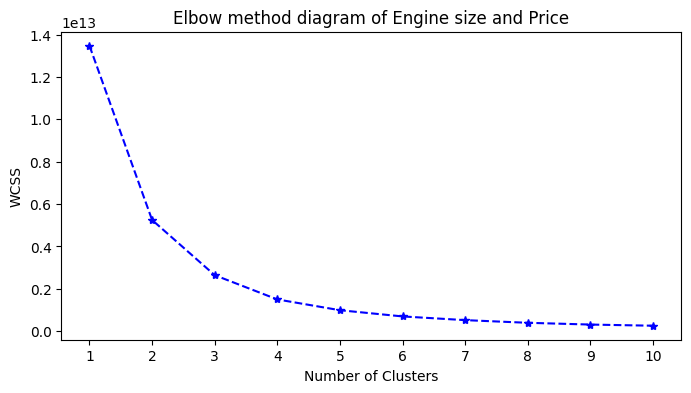

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Engine size", "Price"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
# Modeling and evaluating Kmeans cluster of 3 clusters
kmeans_clustering(X, ["Engine size", "Price"], 3)

K-Means Clustering Performance Scores for Engine size and Price
Silhouette Score: 0.678
Calinski-Harabasz Index (CHI): 102440.439
Davies-Bouldin Index (DBI): 0.528


#### 2. Kmeans Clustering for Engine size and Mileage

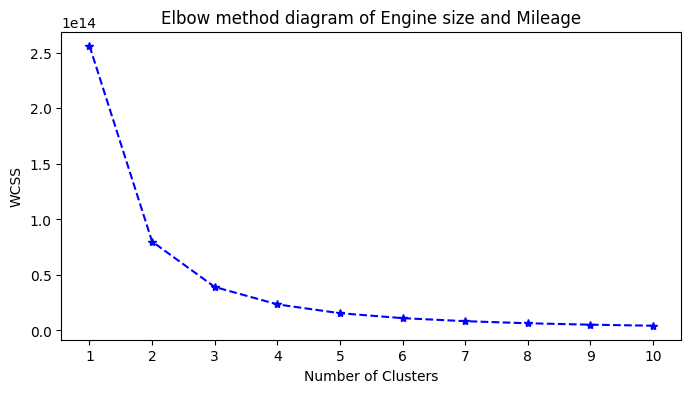

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Engine size", "Mileage"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
# Modeling and evaluating Kmeans cluster of 3
kmeans_clustering(X, ["Engine size", "Mileage"], 3)

K-Means Clustering Performance Scores for Engine size and Mileage
Silhouette Score: 0.570
Calinski-Harabasz Index (CHI): 138569.762
Davies-Bouldin Index (DBI): 0.539


#### 3. Kmeans Clustering for Engine size and Year of manufacture

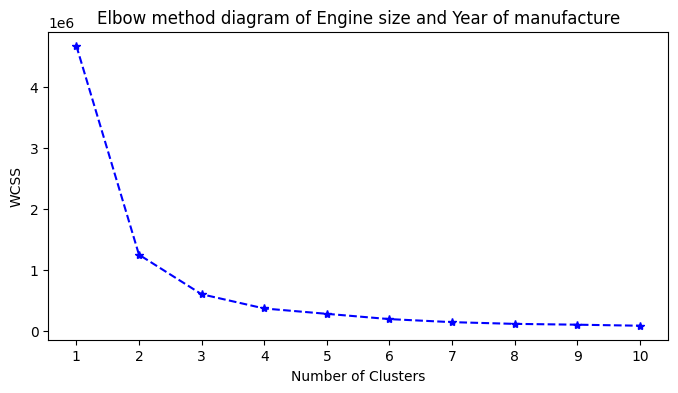

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Engine size", "Year of manufacture"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
# Modeling and evaluating Kmeans cluster of 3
kmeans_clustering(X, ["Engine size", "Year of manufacture"], 3)

K-Means Clustering Performance Scores for Engine size and Year of manufacture
Silhouette Score: 0.562
Calinski-Harabasz Index (CHI): 169467.764
Davies-Bouldin Index (DBI): 0.532


#### 4. Kmeans Clustering for Engine size, Mileage and Price

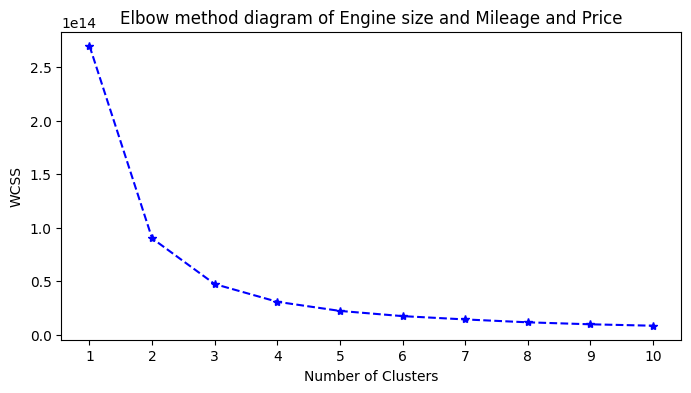

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Engine size", "Mileage", "Price"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
# Modeling and evaluating Kmeans cluster of 3
kmeans_clustering(X, ["Engine size", "Mileage", "Price"], 3)

K-Means Clustering Performance Scores for Engine size and Mileage and Price
Silhouette Score: 0.532
Calinski-Harabasz Index (CHI): 117156.714
Davies-Bouldin Index (DBI): 0.575


#### 5. Kmeans Clustering for Engine size, Mileage and Year of manufacture

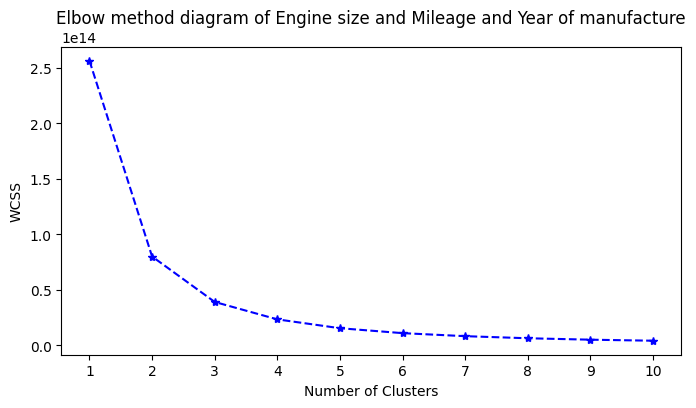

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Engine size", "Mileage", "Year of manufacture"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
# Modelling and evaluating feature combinations
kmeans_clustering(X, ["Engine size", "Mileage", "Year of manufacture"], 3)

K-Means Clustering Performance Scores for Engine size and Mileage and Year of manufacture
Silhouette Score: 0.570
Calinski-Harabasz Index (CHI): 138582.391
Davies-Bouldin Index (DBI): 0.539


#### 6. Kmeans Clustering for Engine size, Price and Year of manufacture

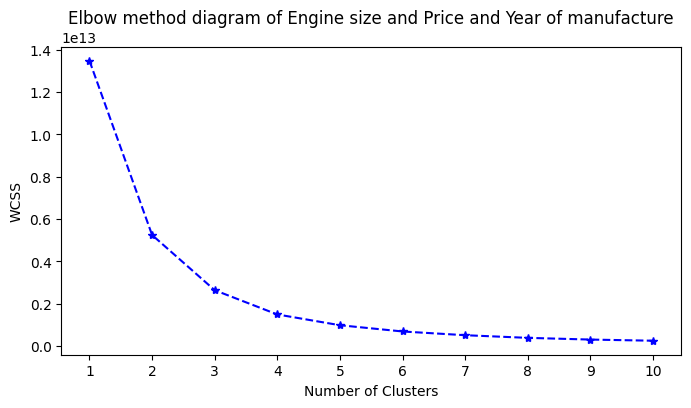

In [ ]:
# Obtaining optimal clusters
optimal_clusters(X, ["Engine size", "Price", "Year of manufacture"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
#Modelling and evaluating feature combinations
kmeans_clustering(X, ["Engine size", "Price", "Year of manufacture"], 3)

K-Means Clustering Performance Scores for Engine size and Price and Year of manufacture
Silhouette Score: 0.677
Calinski-Harabasz Index (CHI): 102442.311
Davies-Bouldin Index (DBI): 0.528


#### 7. Kmeans Clustering for Engine size, Mileage, Price and Year of manufacture

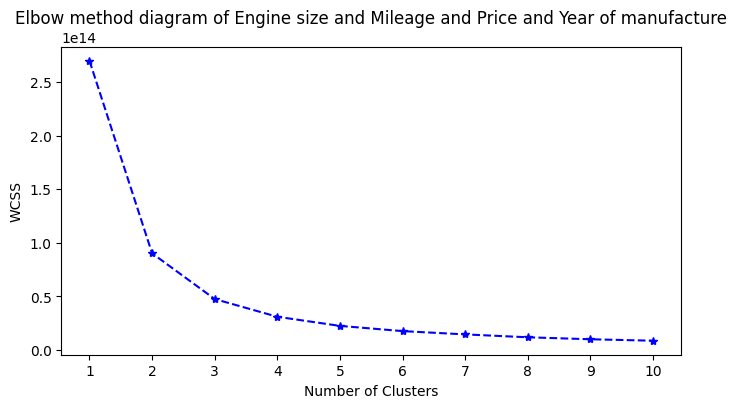

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Engine size", "Mileage", "Price","Year of manufacture"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
# Modelling and Evaluating feature combinations
kmeans_clustering(X, ["Engine size", "Mileage", "Price", "Year of manufacture"], 3)

K-Means Clustering Performance Scores for Engine size and Mileage and Price and Year of manufacture
Silhouette Score: 0.532
Calinski-Harabasz Index (CHI): 117156.711
Davies-Bouldin Index (DBI): 0.575


#### 8. Kmeans Clustering for Mileage and Year of manufacture

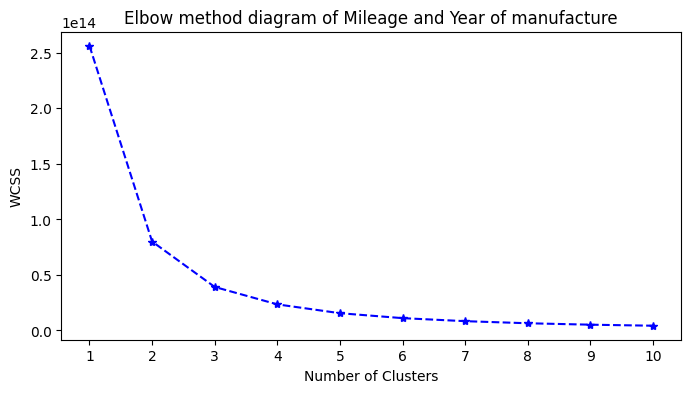

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Mileage","Year of manufacture"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
#Modelling and evaluation of feature combinations
kmeans_clustering(X, ["Mileage", "Year of manufacture"], 3)

K-Means Clustering Performance Scores for Mileage and Year of manufacture
Silhouette Score: 0.570
Calinski-Harabasz Index (CHI): 138569.757
Davies-Bouldin Index (DBI): 0.539


#### 9. Kmeans Clustering for Mileage and Price

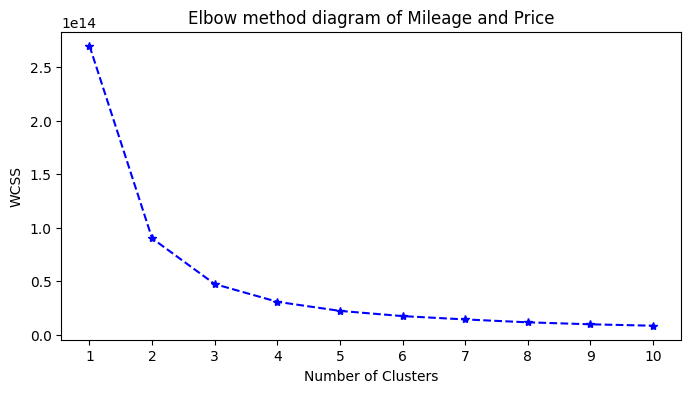

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Mileage","Price"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
#Modelling and evaluating feature combinations
kmeans_clustering(X, ["Mileage", "Price"], 3)

K-Means Clustering Performance Scores for Mileage and Price
Silhouette Score: 0.532
Calinski-Harabasz Index (CHI): 117151.984
Davies-Bouldin Index (DBI): 0.575


#### 10. Kmeans Clustering for Mileage, Year of manufactured and Price

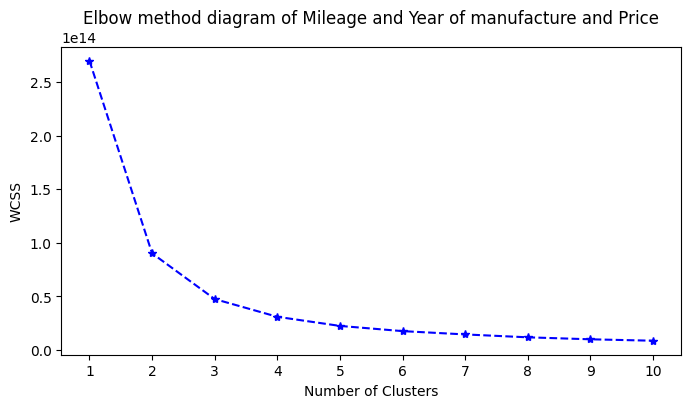

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Mileage","Year of manufacture", "Price"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
#Modelling and evaluating feature combinations
kmeans_clustering(X, ["Mileage", "Year of manufacture", "Price"], 3)

K-Means Clustering Performance Scores for Mileage and Year of manufacture and Price
Silhouette Score: 0.532
Calinski-Harabasz Index (CHI): 117156.711
Davies-Bouldin Index (DBI): 0.575


#### 11. Kmeans Clustering for Year of manufactured and Price

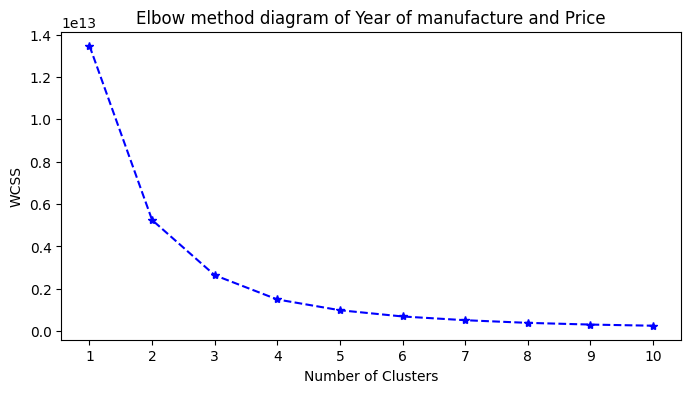

In [ ]:
# Checking the optimal number of clusters
optimal_clusters(X, ["Year of manufacture", "Price"])

The optimal k is 3 because the elbow of the curve is at the third point.

In [ ]:
#Modelling and evaluating feature combinations
kmeans_clustering(X, ["Year of manufacture", "Price"], 3)

K-Means Clustering Performance Scores for Year of manufacture and Price
Silhouette Score: 0.678
Calinski-Harabasz Index (CHI): 102440.368
Davies-Bouldin Index (DBI): 0.528


#### K-Means Clustering Best Clusters
From the results we see that these combinations had the highest performance:

- Cluster 1: Engine size and Prince
- Cluster 11: Year of manufacture and Price
- Cluster 6: Engine size, Price and Year of Manufacture

This is because they have the highest Silhouette score, a significant high Calinski-Harabasz Index (CHI) and the lowest Davies-Bouldin Index (DBI)

***(G). Compare the results of the k-Means clustering model from part (f) to at least one other clustering algorithm. Which algorithm produces the best clustering? Use suitable evaluation metrics to justify your answer.***


### Comparing K-Means Clustering Result with BIRCH Clustering

In [ ]:
# Importing Birch clustering model
from sklearn.cluster import Birch

Since we'd be using same feature combinations and we'll be using the k-means clustering optimal k for birch optimal k since both can be obtained using the elbow method

In [ ]:
# Function to determine cluster and get prediction
def birch_clustering(df, features, n_clusters):
    # Instantiating an object of the cluster algorithm
    birch = Birch(n_clusters = n_clusters)
    birch.fit(df[features])
    labels = birch.labels_

    # Evaluation of metrics
    sih = silhouette_score(df[features], labels)
    chi = calinski_harabasz_score(df[features], labels)
    dbi = davies_bouldin_score(df[features], labels)

    # Printing values
    print("BIRCH Clustering Performance Scores for " + " and ".join(features))
    print("=====================================")
    print(f"Silhouette Score: {sih:.3f}")
    print(f"Calinski-Harabasz Index (CHI): {chi:.3f}")
    print(f"Davies-Bouldin Index (DBI): {dbi:.3f}")

#### 1. BIRCH Clustering for Engine size and Price

In [ ]:
# Modeling and evaluating feature combinations
birch_clustering(X, ["Engine size", "Price"], 3)

BIRCH Clustering Performance Scores for Engine size and Price
Silhouette Score: 0.685
Calinski-Harabasz Index (CHI): 85034.062
Davies-Bouldin Index (DBI): 0.473


#### 2. BIRCH Clustering for Engine size and Mileage

In [ ]:
# Modeling and evaluating feature combinations
birch_clustering(X, ["Engine size", "Mileage"], 3)

BIRCH Clustering Performance Scores for Engine size and Mileage
Silhouette Score: 0.567
Calinski-Harabasz Index (CHI): 137053.656
Davies-Bouldin Index (DBI): 0.536


#### 3. BIRCH Clustering for Engine size and Year of manufacture

In [ ]:
# Modeling and evaluating feature combinations
birch_clustering(X, ["Engine size", "Year of manufacture"], 3)

BIRCH Clustering Performance Scores for Engine size and Year of manufacture
Silhouette Score: 0.561
Calinski-Harabasz Index (CHI): 168550.893
Davies-Bouldin Index (DBI): 0.533


#### 4. BIRCH Clustering for Engine size, Mileage and Price

In [ ]:
# Modeling and evaluating feature combinations
birch_clustering(X, ["Engine size", "Mileage", "Price"], 3)

BIRCH Clustering Performance Scores for Engine size and Mileage and Price
Silhouette Score: 0.499
Calinski-Harabasz Index (CHI): 104805.653
Davies-Bouldin Index (DBI): 0.603


#### 5. BIRCH Clustering for Engine size, Mileage and Year of manufacture

In [ ]:
# Modelling and evaluating feature combinations
birch_clustering(X, ["Engine size", "Mileage", "Year of manufacture"], 3)

BIRCH Clustering Performance Scores for Engine size and Mileage and Year of manufacture
Silhouette Score: 0.548
Calinski-Harabasz Index (CHI): 129388.131
Davies-Bouldin Index (DBI): 0.547


#### 6. BIRCH Clustering for Engine size, Price and Year of manufacture

In [ ]:
#Modelling and evaluating feature combinations
birch_clustering(X, ["Engine size", "Price", "Year of manufacture"], 3)

BIRCH Clustering Performance Scores for Engine size and Price and Year of manufacture
Silhouette Score: 0.679
Calinski-Harabasz Index (CHI): 102070.765
Davies-Bouldin Index (DBI): 0.527


#### 7. BIRCH Clustering for Engine size, Mileage, Price and Year of manufacture

In [ ]:
# Modelling and Evaluating feature combinations
birch_clustering(X, ["Engine size", "Mileage", "Price", "Year of manufacture"], 3)

BIRCH Clustering Performance Scores for Engine size and Mileage and Price and Year of manufacture
Silhouette Score: 0.535
Calinski-Harabasz Index (CHI): 96491.599
Davies-Bouldin Index (DBI): 0.548


#### 8. Kmeans Clustering for Mileage and Year of manufacture

In [ ]:
#Modelling and evaluation of feature combinations
birch_clustering(X, ["Mileage", "Year of manufacture"], 3)

BIRCH Clustering Performance Scores for Mileage and Year of manufacture
Silhouette Score: 0.568
Calinski-Harabasz Index (CHI): 137809.077
Davies-Bouldin Index (DBI): 0.538


#### 9. BIRCh Clustering for Mileage and Price

In [ ]:
#Modelling and evaluating feature combinations
birch_clustering(X, ["Mileage", "Price"], 3)

BIRCH Clustering Performance Scores for Mileage and Price
Silhouette Score: 0.497
Calinski-Harabasz Index (CHI): 105496.252
Davies-Bouldin Index (DBI): 0.574


#### 10. BIRCH Clustering for Mileage, Year of manufactured and Price

In [ ]:
#Modelling and evaluating feature combinations
birch_clustering(X, ["Mileage", "Year of manufacture", "Price"], 3)

BIRCH Clustering Performance Scores for Mileage and Year of manufacture and Price
Silhouette Score: 0.535
Calinski-Harabasz Index (CHI): 96491.599
Davies-Bouldin Index (DBI): 0.548


#### 11. BIRCH Clustering for Year of manufactured and Price

In [ ]:
#Modelling and evaluating feature combinations
birch_clustering(X, ["Year of manufacture", "Price"], 3)

BIRCH Clustering Performance Scores for Year of manufacture and Price
Silhouette Score: 0.648
Calinski-Harabasz Index (CHI): 89396.848
Davies-Bouldin Index (DBI): 0.588


 #### Model with best cluster
In both clustering models, the combination of Engine size and Price shows the best performance across all metrics. It has a high Silhouette Score, relatively high Calinski-Harabasz Index, and low Davies-Bouldin Index.

But based on the results, BIRCH clustering with Engine size and Price appears to produce the best overall clustering results. It demonstrates a good balance of cluster separation and cohesion as indicated by the metrics.